In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/SameerBramhecha/LP-5/master/DL/1_boston_housing.csv")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
X = df.drop('MEDV', axis=1)
Y = df['MEDV']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

/home/rohandoshi21/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/rohandoshi21/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rohandoshi21/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/rohandoshi21/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mae', optimizer='adam', metrics=['mse', 'mae'])

In [16]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
12/12 [==============================] - 0s 1ms/step - loss: 22.3745 - mse: 583.9659 - mae: 22.3745
Epoch 2/50
12/12 [==============================] - 0s 1ms/step - loss: 21.7049 - mse: 556.2174 - mae: 21.7049
Epoch 3/50
12/12 [==============================] - 0s 1ms/step - loss: 20.9439 - mse: 525.5681 - mae: 20.9439
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 20.0167 - mse: 489.2587 - mae: 20.0167
Epoch 5/50
12/12 [==============================] - 0s 2ms/step - loss: 18.8900 - mse: 447.9534 - mae: 18.8900
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 17.5744 - mse: 402.1766 - mae: 17.5744
Epoch 7/50
12/12 [==============================] - 0s 2ms/step - loss: 16.1106 - mse: 354.5526 - mae: 16.1106
Epoch 8/50
12/12 [==============================] - 0s 1ms/step - loss: 14.6140 - mse: 305.9286 - mae: 14.6140
Epoch 9/50
12/12 [==============================] - 0s 2ms/step - loss: 13.2068 - mse: 261.4701 - mae: 13.2068
E

In [17]:
metrics = model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 4.4086 - mse: 46.6201 - mae: 4.4086


In [18]:
metrics

[4.408583641052246, 46.62009811401367, 4.408583641052246]

In [19]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 1ms/step


In [21]:
y_test = np.array(y_test).reshape(-1,1)

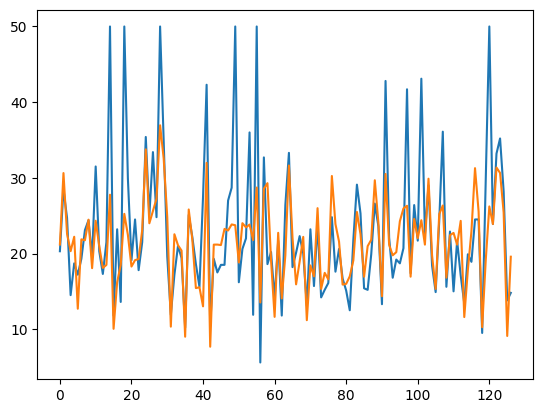

In [24]:
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Pred')
